 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_data = Path('Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

C:\Users\Nate\AppData\Local\Temp\ipykernel_12912\566067786.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(whale_returns_data, index_col='Date', infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna().copy()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_data = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

C:\Users\Nate\AppData\Local\Temp\ipykernel_12912\250701993.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns = pd.read_csv(algo_returns_data, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna().copy()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_data = Path('Resources/sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

C:\Users\Nate\AppData\Local\Temp\ipykernel_12912\3658100167.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_history = pd.read_csv(sp500_history_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
C:\Users\Nate\AppData\Local\Temp\ipykernel_12912\3658100167.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history = pd.read_csv(sp500_history_data, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].str.replace(',', '')
sp500_history['Close'] = sp500_history['Close'].astype(float)
sp500_history.dtypes

Close    float64
dtype: object

In [11]:
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_returns = sp500_returns.dropna().copy()
sp500_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={'Close':'SP500'})
sp500_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
module_data = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
module_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

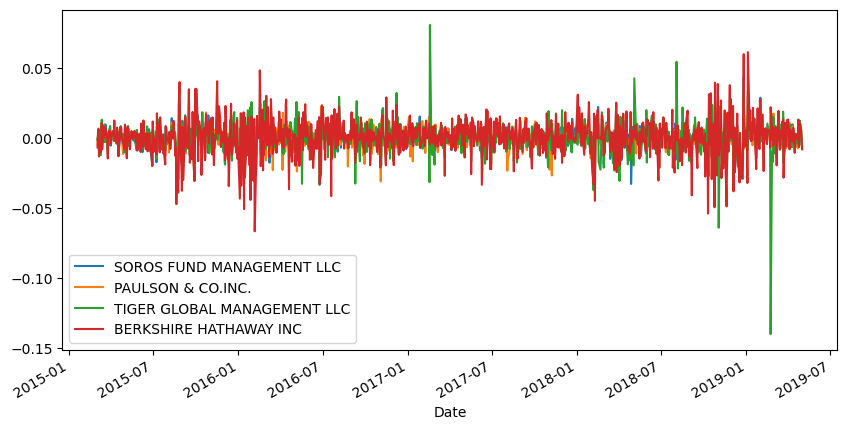

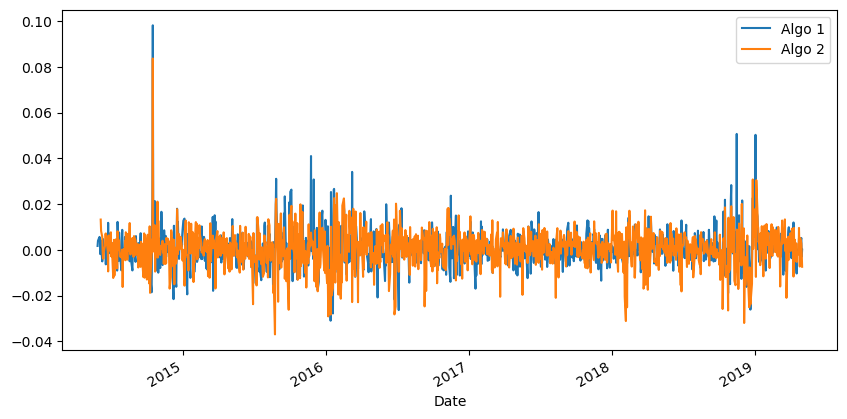

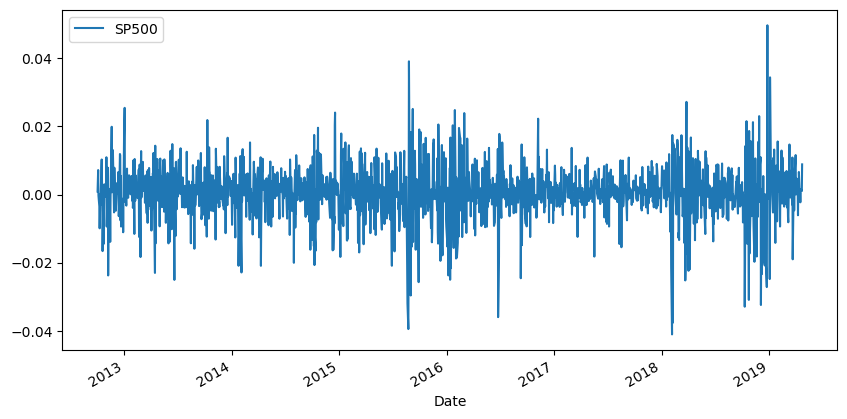

In [16]:
# Plot daily returns of all portfolios
whale_returns.plot(figsize=(10,5))
algo_returns.plot(figsize=(10,5))
sp500_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

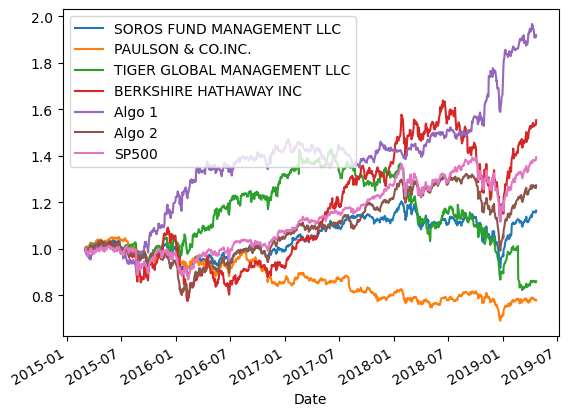

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + module_data).cumprod()
# Plot cumulative returns
cumulative_returns.plot();

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

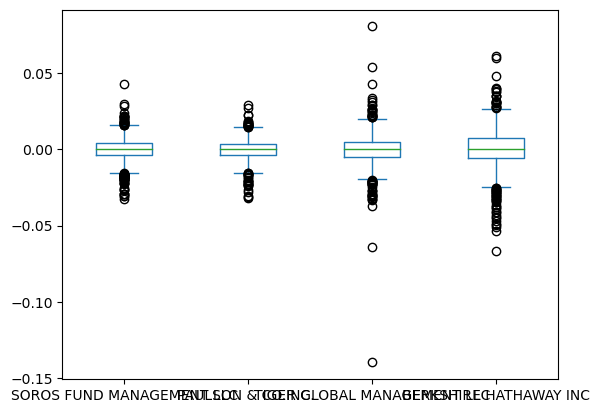

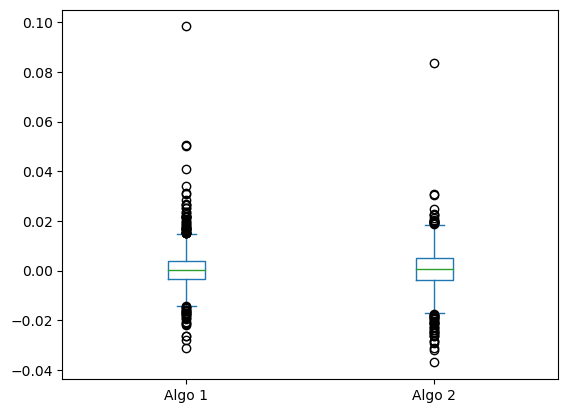

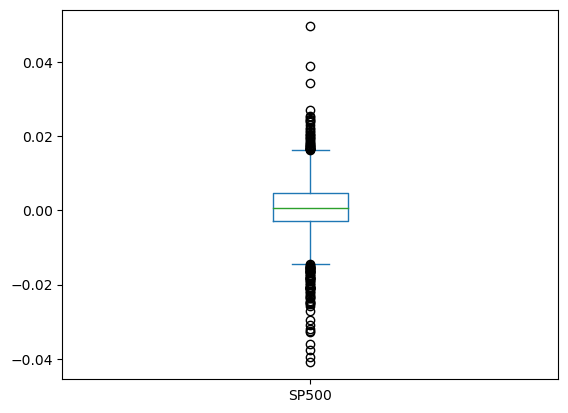

In [18]:
# Box plot to visually show risk
whale_returns.plot.box()
algo_returns.plot.box()
sp500_returns.plot.box()

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = module_data.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008551
Algo 2                         0.008339
SOROS FUND MANAGEMENT LLC      0.007895
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
daily_std > daily_std[2]
# Determine which portfolios are riskier than the S&P 500


C:\Users\Nate\AppData\Local\Temp\ipykernel_12912\1444472989.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  daily_std > daily_std[2]


BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
SP500                          False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

<Axes: >

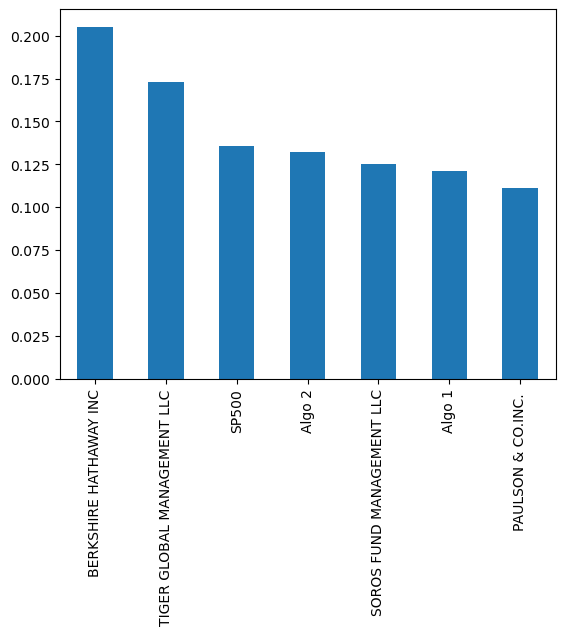

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std.plot(kind='bar')

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

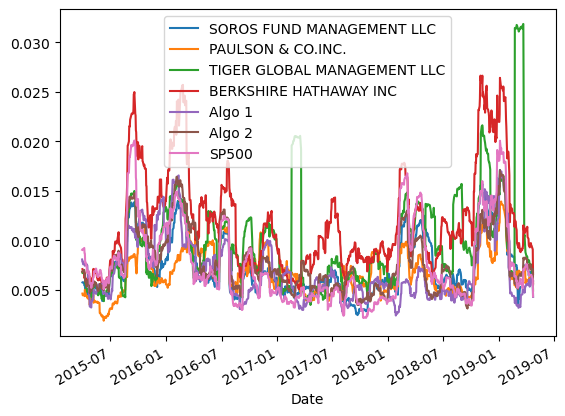

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolio_std = module_data.rolling(window=21).std()
# Plot the rolling standard deviation
all_portfolio_std.plot();

### Calculate and plot the correlation

<Axes: >

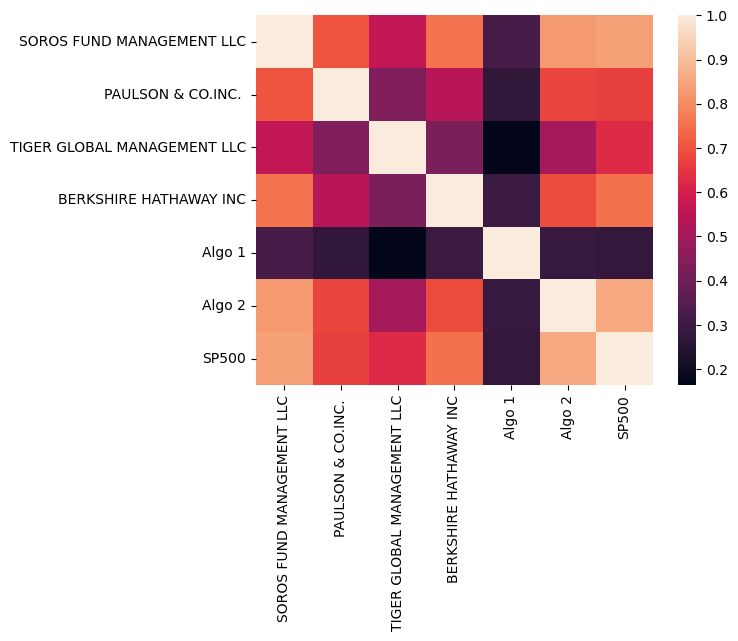

In [23]:
# Calculate the correlation
portfolio_corr = module_data.corr()
# Display de correlation matrix
sns.heatmap(portfolio_corr)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

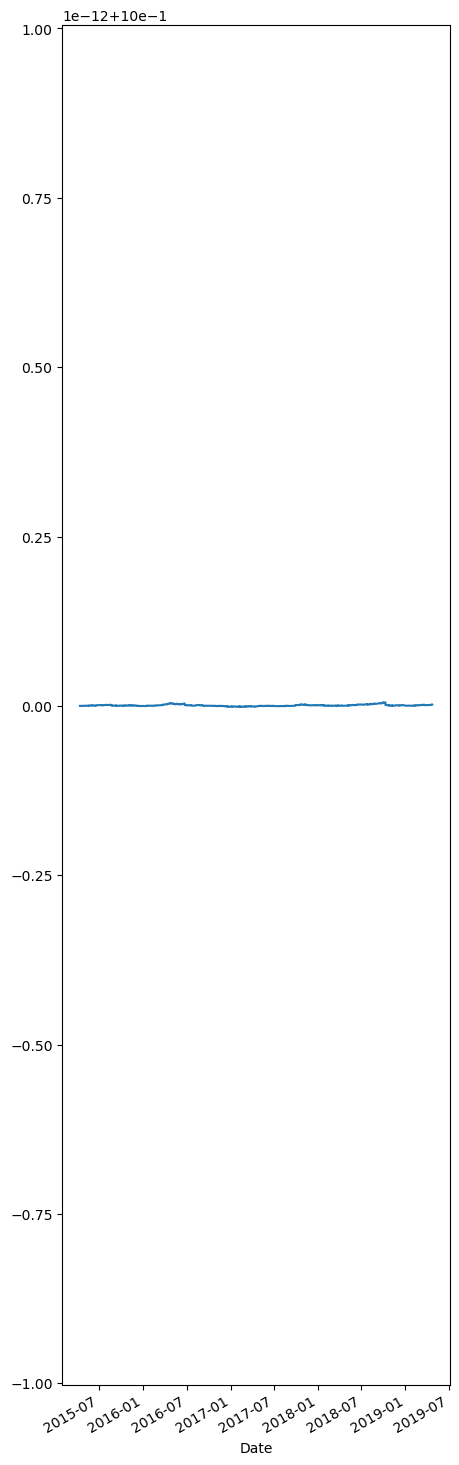

In [24]:
# Calculate covariance of a single portfolio
covariance = module_data['SP500'].rolling(window=30).cov(module_data)['SP500']
# Calculate variance of S&P 500
variance = module_data['SP500'].rolling(window=30).var()
# Computing beta
beta = covariance/variance
# Plot beta trend
beta.plot(figsize=(5,20))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

NameError: name 'plt' is not defined

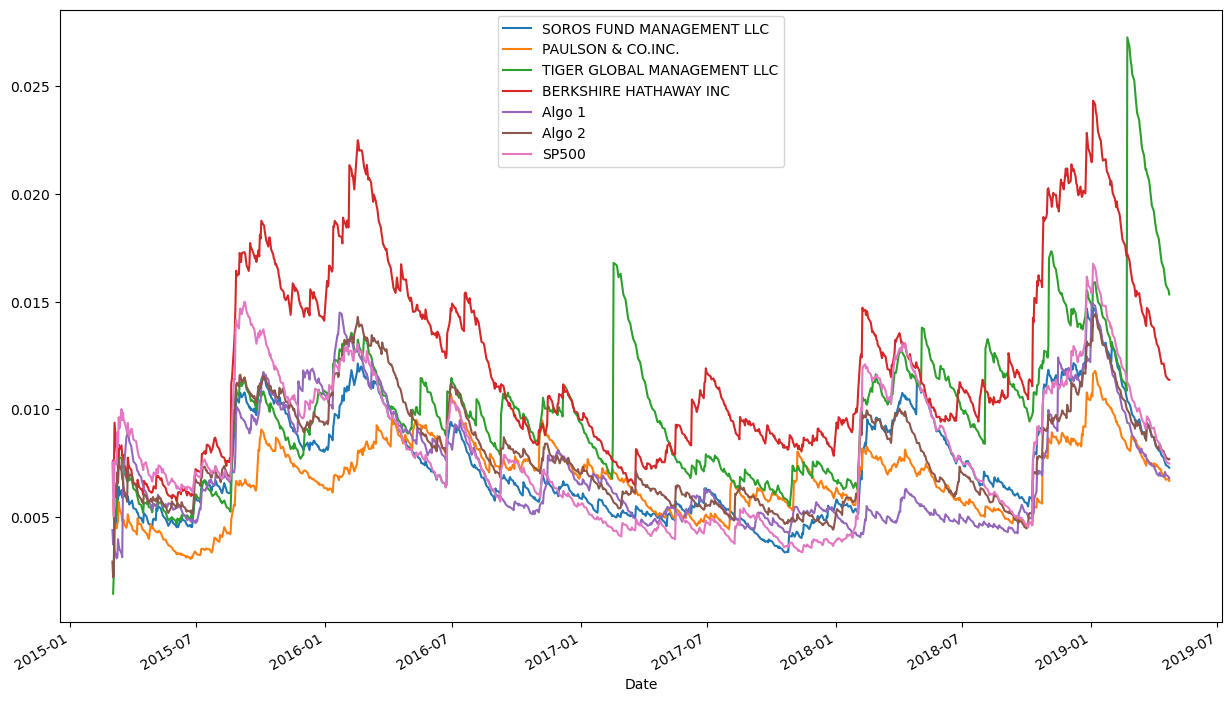

In [25]:
# Use `ewm` to calculate the rolling window
module_data.ewm(halflife=21).std().plot(figsize=(15,9));
plt.legend(loc='upper left')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (module_data.mean()*252) / (module_data.std() * np.sqrt(252))

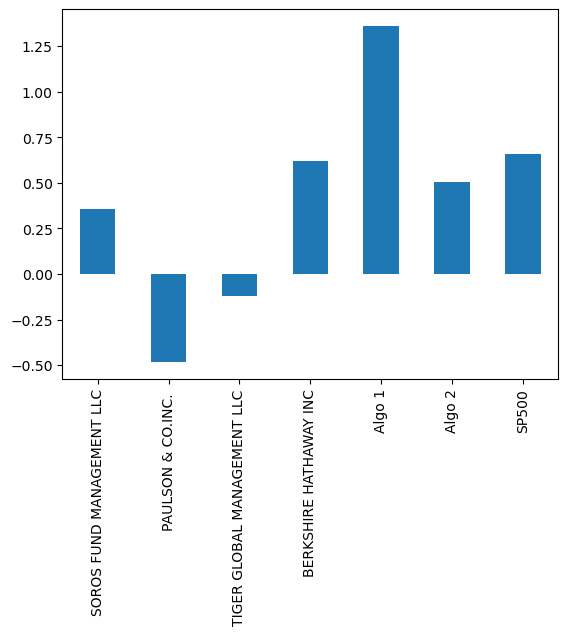

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---The high Sharpe ratio of Algo 1 indicated it is a safer portfolio than the Whale and S&P 500 portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
aapl_historical_data = Path('Resources/aapl_historical.csv')
aapl_historical = pd.read_csv(aapl_historical_data, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_historical = aapl_historical.sort_index()
aapl_historical.head()

C:\Users\Nate\AppData\Local\Temp\ipykernel_12912\409635384.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_historical = pd.read_csv(aapl_historical_data, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [29]:
# Reading data from 2nd stock
cost_historical_data = Path('Resources/cost_historical.csv')
cost_historical = pd.read_csv(cost_historical_data, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_historical = cost_historical.sort_index()
cost_historical.head()

C:\Users\Nate\AppData\Local\Temp\ipykernel_12912\4187772307.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_historical = pd.read_csv(cost_historical_data, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [30]:
# Reading data from 3rd stock
goog_historical_data = Path('Resources/goog_historical.csv')
goog_historical = pd.read_csv(goog_historical_data, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_historical = goog_historical.sort_index()
goog_historical.head()

C:\Users\Nate\AppData\Local\Temp\ipykernel_12912\2152296570.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_historical = pd.read_csv(goog_historical_data, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [31]:
# Combine all stocks in a single DataFrame
custom_data = pd.concat([goog_historical, cost_historical, aapl_historical], axis='rows', join='inner')
custom_data.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [32]:
# Reset Date index
custom_data. reset_index()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59
...,...,...,...
745,2019-05-03,AAPL,211.75
746,2019-05-06,AAPL,208.48
747,2019-05-07,AAPL,202.86
748,2019-05-08,AAPL,202.90


In [33]:
# Reorganize portfolio data by having a column per symbol
pivot_df = custom_data.pivot_table(index='Trade DATE', columns='Symbol', values='NOCP')
pivot_df

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [34]:
# Calculate daily returns daily_returns = 
custom_returns = pivot_df.pct_change()

# Drop NAs
pivot_df = custom_returns.dropna().copy()
# Display sample data
custom_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
Final_data = custom_returns.dot(weights)
Final_data = pivot_df.pct_change()[1:]
Final_data.head()
# Display sample data


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-15,2.895452,-4.331291,-11.790218
2018-05-16,-2.026877,-9.091523,-1.123479
2018-05-17,-1.677584,-0.728937,-2.249029
2018-05-18,-0.424935,-1.715895,2.857251
2018-05-21,-2.948261,-2.034567,-2.093346


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
Final_data = pd.concat([module_data, custom_returns], axis='columns', join='inner')
Final_data.head(200)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,COST,GOOG
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,NaN,NaN,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.002333,0.000613,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009088,-0.002042,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009333,0.016523,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.006324,0.004479,-0.002940
...,...,...,...,...,...,...,...,...,...,...
2019-02-21,-0.001401,-0.004180,-0.001717,-0.006760,-0.000166,-0.000914,-0.003526,-0.005639,-0.008659,-0.015110
2019-02-22,0.001011,0.004447,-0.139820,0.022029,0.002395,0.008799,0.006411,0.011166,0.004925,0.012215
2019-02-25,-0.002242,-0.003639,-0.009525,0.005358,0.009834,-0.000968,0.001232,0.007285,0.003514,-0.000874
2019-02-26,-0.006030,-0.006118,-0.017294,-0.001617,0.005112,-0.002075,-0.000790,0.000574,0.002580,0.005165


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Final_data = Final_data.dropna().copy()
Final_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,COST,GOOG
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.002333,0.000613,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009088,-0.002042,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009333,0.016523,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.006324,0.004479,-0.002940
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.003637,-0.003206,-0.011339


In [38]:
Final_data.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,COST,GOOG
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.002333,0.000613,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009088,-0.002042,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009333,0.016523,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.006324,0.004479,-0.002940
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.003637,-0.003206,-0.011339
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000100,-0.004019,0.004938
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.019473,0.000897,0.007505
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003594,0.001018,0.000024
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.003287,-0.009723,0.010086


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
Final_data_std = Final_data.std()
annulized_std = Final_data * np.sqrt(252)
annulized_std.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,COST,GOOG
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.014523,0.025952,0.014025,-0.037037,0.009731,0.028041
2018-05-15,-0.011523,-0.022364,-0.050632,-0.231862,-0.018014,-0.018078,-0.108616,-0.144275,-0.032417,-0.302571
2018-05-16,0.137112,0.099126,0.086985,0.068418,-0.036931,0.053034,0.064459,0.148153,0.262301,0.037361
2018-05-17,-0.031042,0.040065,-0.099488,-0.081591,-0.110316,0.082625,-0.013586,-0.100386,0.071100,-0.046665
2018-05-18,-0.069171,-0.042424,-0.203700,-0.035113,0.040597,-0.039629,-0.041785,-0.057729,-0.050900,-0.179999


### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling 21-Day standard deviation'}>

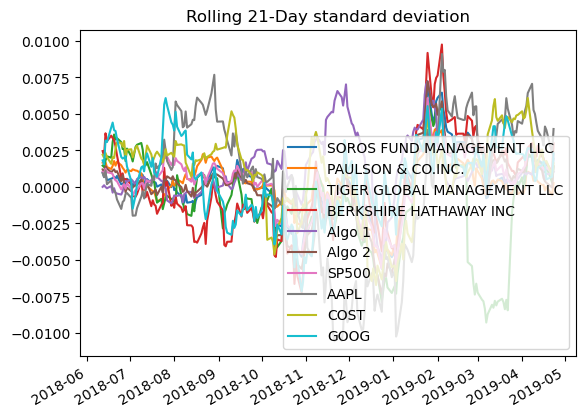

In [40]:
# Calculate rolling standard deviation
Final_data_rolling_std = Final_data.rolling(window=21).mean()
# Plot rolling standard deviation
Final_data_rolling_std.plot(title='Rolling 21-Day standard deviation')



### Calculate and plot the correlation

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

NameError: name 'plt' is not defined

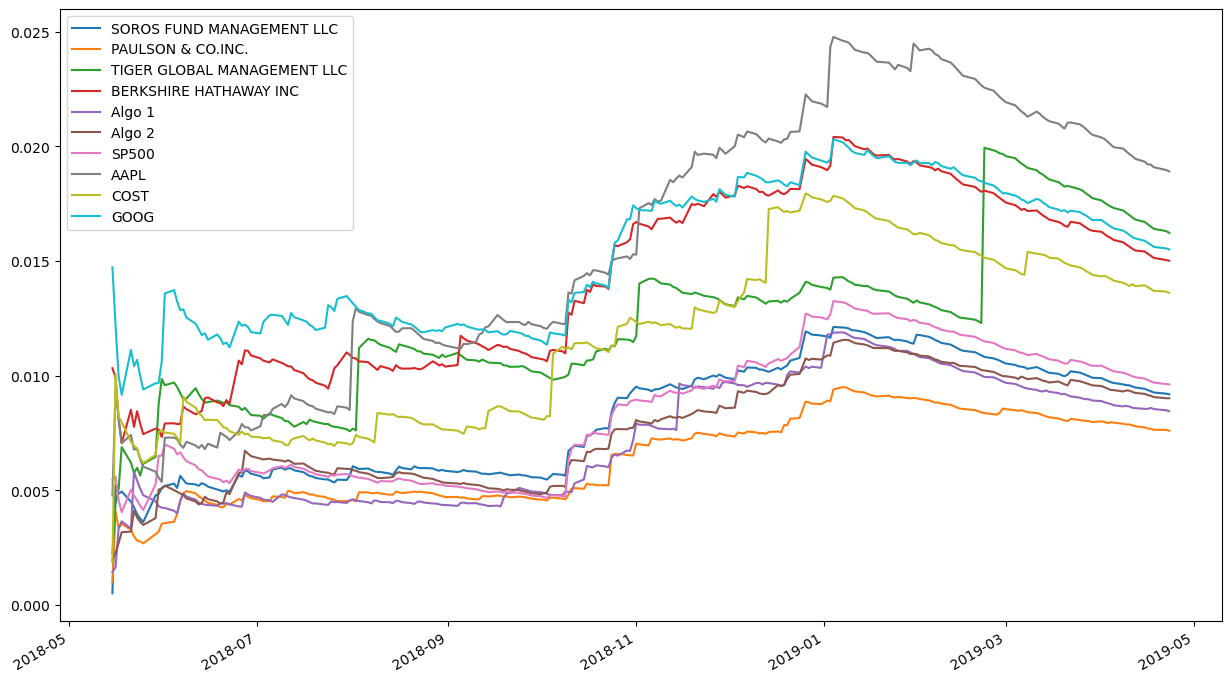

In [41]:
# Calculate and plot Beta
Final_data.ewm(halflife=60).std().plot(figsize=(15,9));
plt.legend(loc='upper left')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (Final_data.mean()*252) / (Final_data.std() * np.sqrt(252))

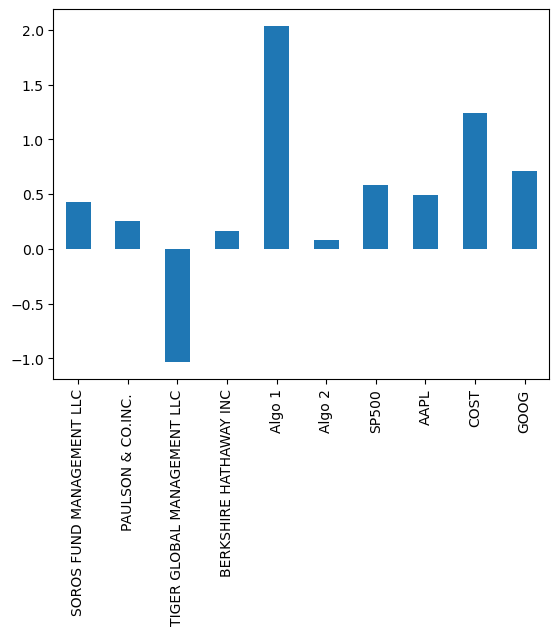

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar');

### How does your portfolio do?

Write your answer here!

In [ ]:
It appears that Cost is the safest bet within the new portfolio. Although none of them are as high on the Sharpe scale as Algo 1, overall they have the best numbers of the portfolios given.